### Midterm Project - Ruggiero Julian
## Analysis of COVID-19 on NYC Boroughs and Zip Codes

In [1]:
# importing libraries needed
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

### First Data Source
https://github.com/nychealth/coronavirus-data/blob/master/tests-by-zcta.csv
<br><br> Comes daily from the NYC Department of Health and Mental Hygiene (DOHMH) Incident Command System for COVID-19 Response.
- MODZCTA: NYC zipcode
- Positive: Cumulative tested positive counts in the zip code.
- Total: Were ever tested for COVID-19 (SARS-CoV-2)
- zcta_cum.perc_pos: ratio Positive/Total

In [2]:
covid_zip_codes=pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/tests-by-zcta.csv')
covid_zip_codes.head()

,MODZCTA,Positive,Total,zcta_cum.perc_pos
0,NaN,1330,1459,91.16
1,99999.0,2,5,NaN
2,10001.0,191,408,46.81
3,10002.0,456,889,51.29
4,10003.0,253,597,42.38


In [3]:
#renaming column
covid_zip_codes.rename(columns = {'MODZCTA':'zip_code', 'zcta_cum.perc_pos':'ratio'}, inplace=True)
covid_zip_codes.head(5)

,zip_code,Positive,Total,ratio
0,NaN,1330,1459,91.16
1,99999.0,2,5,NaN
2,10001.0,191,408,46.81
3,10002.0,456,889,51.29
4,10003.0,253,597,42.38


Citywide, 4,712 people who have tested positive are not listed as a resident of any ZIP code.

### Second Data Source
https://github.com/gitjuli/covid-19/blob/master/uszips.csv
<br><br> Comes from https://simplemaps.com/data/us-zips have population data in the us for each zip code. Data from 2016.
- zip: US zip-code
- Population: Cumulative tested positive counts in the zip code.
- Density: people per sq km

In [4]:
population=pd.read_csv('https://raw.githubusercontent.com/gitjuli/covid-19/master/uszips.csv')
population.rename(columns = {'zip':'zip_code'}, inplace=True)
population.head()

,zip_code,population,density
0,601,17242,111.4
1,602,38442,523.5
2,603,48814,667.9
3,606,6437,60.4
4,610,27073,312.0


In [5]:
# merge
covid_zip_codes = pd.merge(covid_zip_codes[covid_zip_codes['zip_code'].notna()], population, how='inner', on=['zip_code'])
covid_zip_codes.head()

,zip_code,Positive,Total,ratio,population,density
0,10001.0,191,408,46.81,22924,13259.3
1,10002.0,456,889,51.29,74993,35781.9
2,10003.0,253,597,42.38,54682,37524.3
3,10004.0,21,48,43.75,3028,2214.8
4,10005.0,36,108,33.33,8831,37900.9


### Third Data Source
https://github.com/gitjuli/covid-19/blob/master/usincome.csv
<br><br> Data extracted from US Census and Bureau reports.
- zip: US zip-code
- Median: Median population income
- Mean: Mean population income

In [6]:
#get income data
income=pd.read_csv('https://raw.githubusercontent.com/gitjuli/covid-19/master/usincome.csv')
income.rename(columns = {'Zip':'zip_code', 'Median':'median_income', 'Mean':'mean_income'}, inplace=True)
income.head()

,zip_code,median_income,mean_income
0,1001,56663,66688
1,1002,49853,75063
2,1003,28462,35121
3,1005,75423,82442
4,1007,79076,85802


In [7]:
# merge
covid_zip_codes = pd.merge(covid_zip_codes[covid_zip_codes['zip_code'].notna()], income, how='inner', on=['zip_code'])
covid_zip_codes.head()

,zip_code,Positive,Total,ratio,population,density,median_income,mean_income
0,10001.0,191,408,46.81,22924,13259.3,71245,123113
1,10002.0,456,889,51.29,74993,35781.9,30844,46259
2,10003.0,253,597,42.38,54682,37524.3,89999,139331
3,10004.0,21,48,43.75,3028,2214.8,110184,156683
4,10005.0,36,108,33.33,8831,37900.9,115133,163763


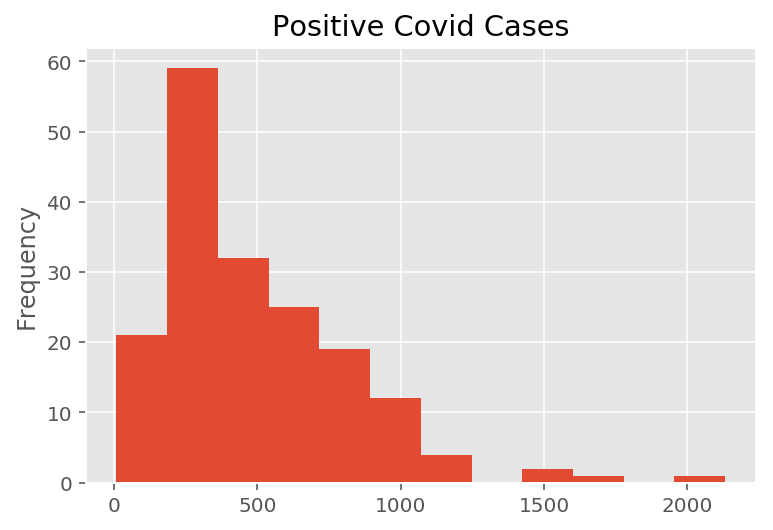

In [8]:
#Histogram of Positive cases
covid_zip_codes[covid_zip_codes['zip_code'].notna()].Positive.plot.hist(bins=12)
plt.title('Positive Covid Cases');

In [9]:
covid_zip_codes[covid_zip_codes['zip_code'].notna()].Positive.describe()

count     176.000000
mean      484.659091
std       339.510265
min         8.000000
25%       242.500000
50%       384.000000
75%       686.000000
max      2132.000000
Name: Positive, dtype: float64

The histogram data shows a right skewed distribution for the positive cases, with a mean of 339.6 per zip code and a std of 230.

### Fourth Data Source
https://github.com/gitjuli/covid-19/blob/master/zip_borough.csv
<br><br> Contains a list of zip code with the corresponding borough.
- Zip: NYC zipcode.
- Borough: NYC borough.

In [10]:
#data source 2 (zip code by borough)
borough=pd.read_csv('https://raw.githubusercontent.com/gitjuli/covid-19/master/zip_borough.csv')
borough.head(1)

,zip,borough
0,10001,Manhattan


In [11]:
#adding borough name to zip_code
borough.rename(columns = {'zip':'zip_code'}, inplace=True)
covid_zip_codes = pd.merge(covid_zip_codes[covid_zip_codes['zip_code'].notna()], borough, how='inner', on=['zip_code'])
covid_zip_codes["zip_code"]=covid_zip_codes["zip_code"].astype(int).astype(str) 
covid_zip_codes["mean_income"]=covid_zip_codes["mean_income"].astype(int)

In [12]:
covid_zip_codes.head()

,zip_code,Positive,Total,ratio,population,density,median_income,mean_income,borough
0,10001,191,408,46.81,22924,13259.3,71245,123113,Manhattan
1,10002,456,889,51.29,74993,35781.9,30844,46259,Manhattan
2,10003,253,597,42.38,54682,37524.3,89999,139331,Manhattan
3,10004,21,48,43.75,3028,2214.8,110184,156683,Manhattan
4,10005,36,108,33.33,8831,37900.9,115133,163763,Manhattan


### Normalization on zip code density
<br>
Creating new field 'positive_per_thousand' which will have number of positive cases per thousand people living in that zip code.

In [13]:
covid_zip_codes["positive_per_thousand"]=(1000 * covid_zip_codes["Positive"])/covid_zip_codes["population"]
covid_zip_codes.head()

,zip_code,Positive,Total,ratio,population,density,median_income,mean_income,borough,positive_per_thousand
0,10001,191,408,46.81,22924,13259.3,71245,123113,Manhattan,8.331879
1,10002,456,889,51.29,74993,35781.9,30844,46259,Manhattan,6.080568
2,10003,253,597,42.38,54682,37524.3,89999,139331,Manhattan,4.626751
3,10004,21,48,43.75,3028,2214.8,110184,156683,Manhattan,6.935271
4,10005,36,108,33.33,8831,37900.9,115133,163763,Manhattan,4.076549


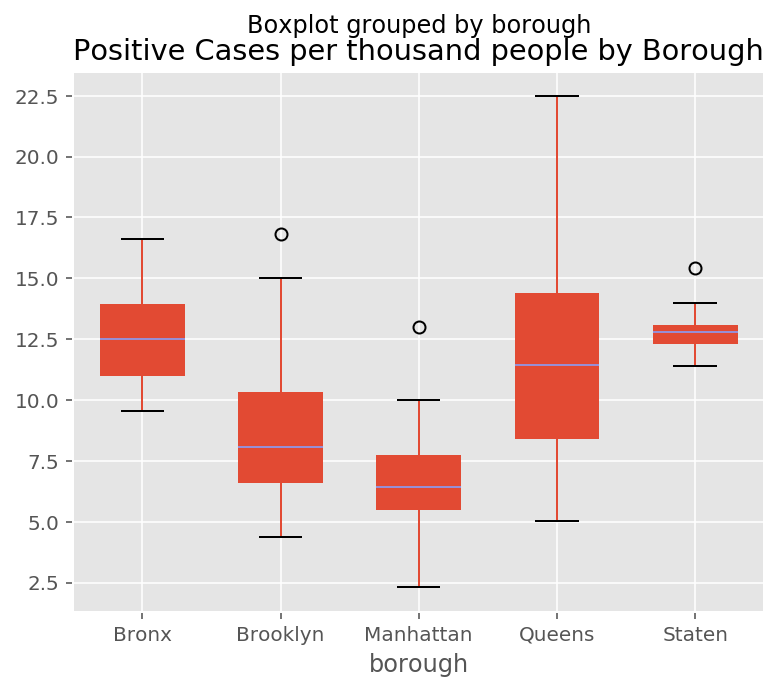

In [14]:
# boxplot NYC borough by number of positive cases
covid_zip_codes.boxplot(column='positive_per_thousand', by='borough', widths = 0.6,patch_artist = True,figsize=(6,5));
plt.title('Positive Cases per thousand people by Borough');

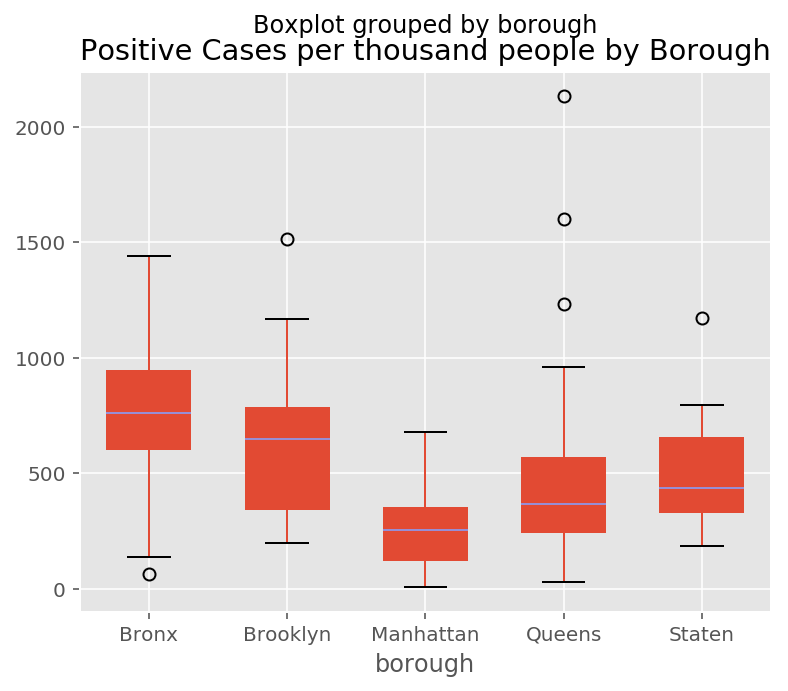

In [15]:
covid_zip_codes.boxplot(column='Positive', by='borough', widths = 0.6,patch_artist = True,figsize=(6,5));
plt.title('Positive Cases per thousand people by Borough');

The box plot shows that Queens has the highest percentage of positive cases per thousand people living in their zip codes. The lenght of the distribution shows it has the largest number of zip-codes affected.

### Linear model to predict positive based on median_income

In [16]:
# linear model to predict positive based on percent_receives_public_assistance

formula_string = "Positive ~ median_income"

model = sm.formula.ols(formula = formula_string, data = covid_zip_codes)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:               Positive   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     37.22
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           6.77e-09
Time:                        16:22:26   Log-Likelihood:                -1243.7
No. Observations:                 174   AIC:                             2491.
Df Residuals:                     172   BIC:                             2498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       822.7709     59.718     13.778

Intercept = 822.770860058313
Slope = -0.005862196423378995
Correlation between median_income and Positive cases:  -0.422
R^2 of median_income in predicting Positive cases:  0.178


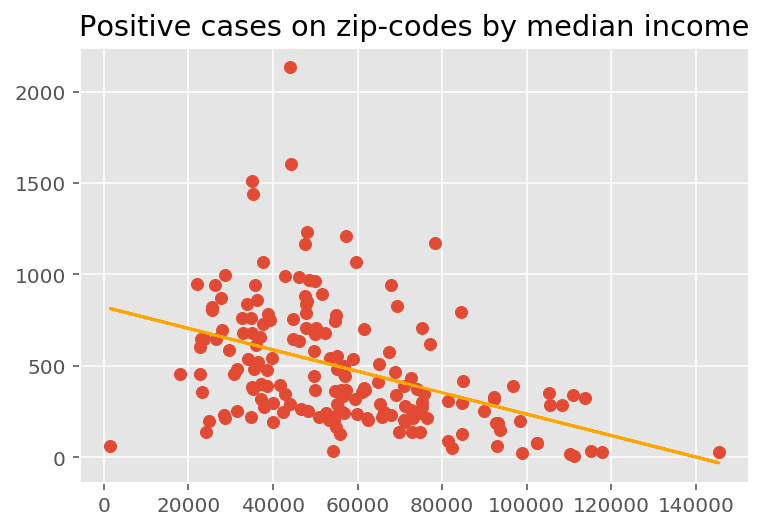

In [17]:
print('Intercept =', model_fitted.params[0])
print('Slope =', model_fitted.params[1])
print("Correlation between median_income and Positive cases: ",np.round(covid_zip_codes.median_income.corr(covid_zip_codes.Positive),3))
print("R^2 of median_income in predicting Positive cases: ",np.round(covid_zip_codes.median_income.corr(covid_zip_codes.Positive)**2,3))

x = covid_zip_codes['median_income']
y = covid_zip_codes['Positive']

y_pred = model_fitted.predict(x)

plt.scatter(covid_zip_codes['median_income'], covid_zip_codes['Positive'])
plt.plot(x, y_pred, color = 'orange')
plt.title('Positive cases on zip-codes by median income');
plt.show();

There is a negative association between median_income and Positive cases, and median income can explain 15.8% of the variability found in number of Positive cases.

Knowing the intercept and slope, we can write down the least squares regression line for the linear model:

#### ${y}$ = 559.0823 - 0.0038 x (median_income)

The slope is -0.0038, meaning that for every unit increase in median_income, the Positive cases decreases by 0.00038. Based on the low p value the median_income is a statistically significant predictor, but the R-squared value is still low to say that is a significant predictor.

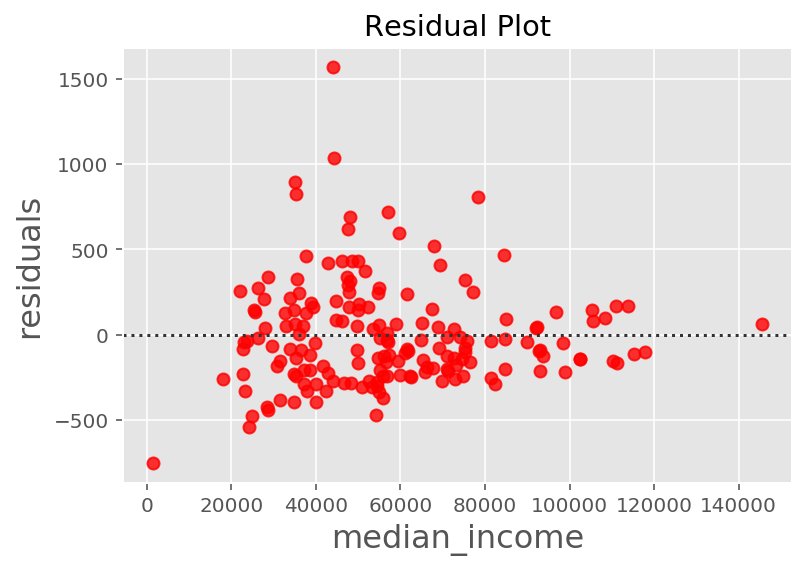

In [18]:
import seaborn as sns
sns.residplot(x, y, color = 'red')
plt.xlabel('median_income', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.title('Residual Plot');
plt.show();

The residuals do not show constant variability.<br>
Nearly normal residuals: To check this condition, we can look at a histogram.

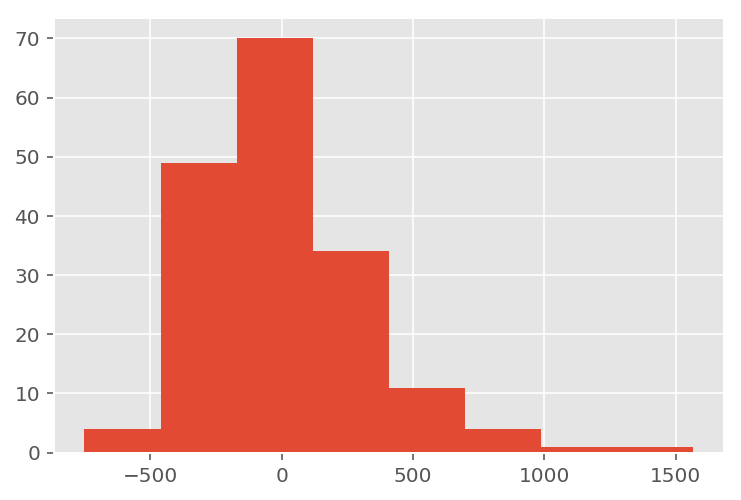

In [19]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8)
plt.show();

The residuals show some right skewed. 

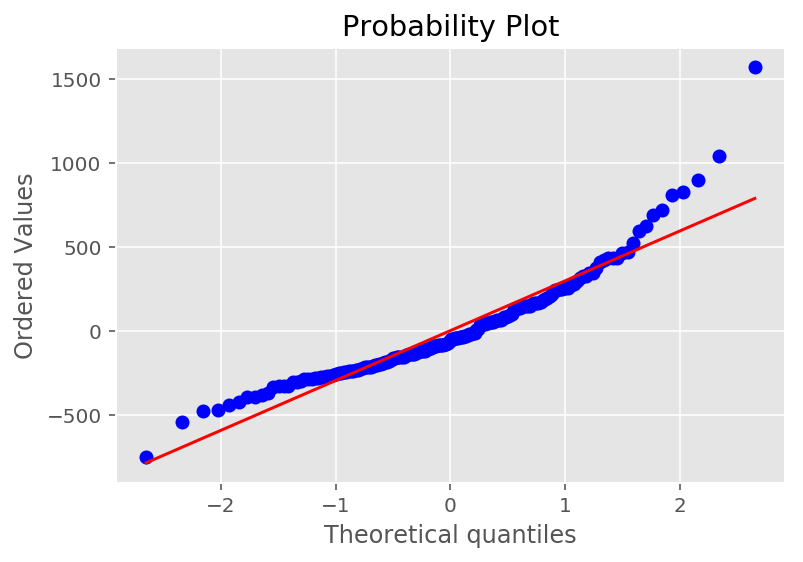

In [20]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

Q-Q plot does not follow what would be expected under the normal distribution.

At least one of the conditions for using linear regression is not met, so I conclude that linear regression cannot be used to predict <code>positive cases</code> from <code>median_income</code>.

### Multiple Linear Regression

In [21]:
covid_zip_codes.dtypes

zip_code                  object
Positive                   int64
Total                      int64
ratio                    float64
population                 int64
density                  float64
median_income              int64
mean_income                int32
borough                   object
positive_per_thousand    float64
dtype: object

Adding dummy variables for borough, as it is the only categorical field.

In [22]:
df_with_dummies = pd.get_dummies(covid_zip_codes, prefix='borough_', columns=['borough'])

In [23]:
df_with_dummies.head()

,zip_code,Positive,Total,ratio,population,density,median_income,mean_income,positive_per_thousand,borough__Bronx,borough__Brooklyn,borough__Manhattan,borough__Queens,borough__Staten
0,10001,191,408,46.81,22924,13259.3,71245,123113,8.331879,0,0,1,0,0
1,10002,456,889,51.29,74993,35781.9,30844,46259,6.080568,0,0,1,0,0
2,10003,253,597,42.38,54682,37524.3,89999,139331,4.626751,0,0,1,0,0
3,10004,21,48,43.75,3028,2214.8,110184,156683,6.935271,0,0,1,0,0
4,10005,36,108,33.33,8831,37900.9,115133,163763,4.076549,0,0,1,0,0


Starting with full model

In [24]:
import statsmodels.api as sm

m_full = sm.formula.ols(formula = 'Positive ~ population + density + median_income + mean_income + borough__Bronx + borough__Brooklyn + borough__Manhattan + borough__Queens + borough__Staten', data = df_with_dummies)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Positive   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     69.18
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           9.07e-49
Time:                        16:22:38   Log-Likelihood:                -1132.8
No. Observations:                 174   AIC:                             2284.
Df Residuals:                     165   BIC:                             2312.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.2487     48

The full model shows a high adjusted R-squared, explaining 91% of the variability found in the number of positive cases.
I will use backward elimination, deleting variables with the highest p-value until adjusted R-squared can't be improved.

In [25]:
# excluding median_income
m_full = sm.formula.ols(formula = 'Positive ~ population + density + mean_income + borough__Bronx + borough__Brooklyn + borough__Manhattan + borough__Queens + borough__Staten', data = df_with_dummies)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Positive   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     78.87
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           1.68e-49
Time:                        16:23:31   Log-Likelihood:                -1133.3
No. Observations:                 174   AIC:                             2283.
Df Residuals:                     166   BIC:                             2308.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.6357     40

Adjusted R-squared still the same. Delete mean_income

In [26]:
# excluding mean_income
m_full = sm.formula.ols(formula = 'Positive ~ population + density + borough__Bronx + borough__Brooklyn + borough__Manhattan + borough__Queens + borough__Staten', data = df_with_dummies)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Positive   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     92.10
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           2.30e-50
Time:                        16:24:09   Log-Likelihood:                -1133.7
No. Observations:                 174   AIC:                             2281.
Df Residuals:                     167   BIC:                             2303.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0394     27

Adjusted R-squared is improved a little. Delete density

In [27]:
# excluding mean_income
m_full = sm.formula.ols(formula = 'Positive ~ population + borough__Bronx + borough__Brooklyn + borough__Manhattan + borough__Queens + borough__Staten', data = df_with_dummies)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Positive   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     108.4
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           1.04e-50
Time:                        16:24:44   Log-Likelihood:                -1135.4
No. Observations:                 174   AIC:                             2283.
Df Residuals:                     168   BIC:                             2302.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -17.7571     25

Adjusted R-squared can't be improved, so it represents the final model.

In [28]:
m_full = sm.formula.ols(formula = 'Positive ~ population + density + borough__Bronx + borough__Brooklyn + borough__Manhattan + borough__Queens + borough__Staten', data = df_with_dummies)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Positive   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     92.10
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           2.30e-50
Time:                        16:25:52   Log-Likelihood:                -1133.7
No. Observations:                 174   AIC:                             2281.
Df Residuals:                     167   BIC:                             2303.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0394     27

y = -1.0394 + 0.0115 x population -0.0031 x density + 109.5621 x borough__Bronx - 137.3381 borough__Booklyn - 91.8313 x borough__Manhattan + 48.2303 x borough__Queens + 70.3376 x borough__Staten

### Visualization of Positive cases per thousand of people in zip code

In [29]:
# transforming zip_code from float to int and then to string to match the data type in the geojson file
covid_zip_codes["zip_code_str"]=covid_zip_codes["zip_code"].astype(int).astype(str) 

The following code uses folium library to plot a choropleth map, using a geojson file that contains the geometry of each zip code using polygon of latitute and longitude coordinates.

In [30]:
import folium
#from folium.plugins import MarkerCluster # for clustering the markers
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=10)
map.choropleth(geo_data="https://raw.githubusercontent.com/gitjuli/covid-19/master/nyc-zip.code.geojson", # I found this NYC zipcode boundaries by googling 
             data=covid_zip_codes, # my dataset
             columns=['zip_code_str', 'positive_per_thousand'], # zip code is here for matching the geojson zipcode, positive_per_thousand is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our zip_code_str column
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Positive Cases Per Thousand People')
map

C:\Users\julir\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


There are some black areas, corresponding to zip codes that did not report cases. In this case I identified them manually, but a function can be created to do that.

In [31]:
missing_zip_codes=['11001','00083','11430','11359','11371','11251','11040','10065','10075','11005']
for i in missing_zip_codes:
    covid_zip_codes = covid_zip_codes.append({'zip_code_str': i, 'positive_per_thousand': 0, 'Positive': 0}, ignore_index=True)

In [32]:
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=10)
map.choropleth(geo_data="https://raw.githubusercontent.com/gitjuli/covid-19/master/nyc-zip.code.geojson", # I found this NYC zipcode boundaries by googling 
             data=covid_zip_codes, # my dataset
             columns=['zip_code_str', 'positive_per_thousand'], # zip code is here for matching the geojson zipcode, positive_per_thousand is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our zip_code_str column
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Positive Cases Per Thousand People in Zip Code')
map

In [33]:
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=10)
map.choropleth(geo_data="https://raw.githubusercontent.com/gitjuli/covid-19/master/nyc-zip.code.geojson", # I found this NYC zipcode boundaries by googling 
             data=covid_zip_codes, # my dataset
             columns=['zip_code_str', 'Positive'], # zip code is here for matching the geojson zipcode, positive_per_thousand is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our zip_code_str column
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Positive Cases Per Zip Code')
map